### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正太分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [13]:
import numpy as np
import scipy as sp  # SciPy是一个开源的Python算法库和数学工具包。SciPy包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# 模仿命令行来访问magic函数的在IPython中独有的形式,可以在Ipython编译器里直接使用,功能是可以内嵌绘图,并且可以省略掉plt.show()这一步.注意: 既然是IPython的内置magic函数,那么在Pycharm中是不会支持的.
%matplotlib inline  


In [14]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)  # 系数可以通过poly1d( )函数转换为多项式对象,此对象可以像函数一样调用,它返回多项式函数的值.
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

例: *ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [30]:
# 10个点 
x = np.linspace(0, 1, 10)  # numpy.linspace是用于创建一个一维数组，并且是等差数列构成的一维数组，它最常用的有三个参数。第一个参数表示起始点，第二个参数表示终止点，第三个参数表示数列的个数。
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    M为多项式的次数
    """  
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)  # 返回M+1个服从“0~1”均匀分布的随机样本值
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print("Fitting Parameters: ", p_lsq[0])
    print("p_lsq: ", p_lsq)
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label = 'real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq
    
    
    
    
    

注: 
python的科学计算包scipy的里面提供了一个函数，可以求出任意的想要拟合的函数的参数。那就是scipy.optimize包里面的leastsq函数。
该函数的返回值是一个数组。第一个元素就是最佳拟合参数（一般 数组），第二个元素是个1到4的整数时，表示计算正确完成。

函数原型是:

```
leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=0.0, factor=100, diag=None, warning=True)
```
一般我们只要指定前三个参数就可以了:

```
func 是我们自己定义的一个计算误差的函数，

x0 是计算的初始参数值

args 是指定func的其他参数
```

Fitting Parameters:  [-0.00916895]
p_lsq:  (array([-0.00916895]), 1)


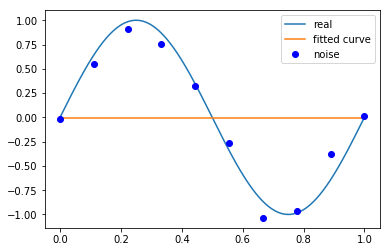

In [31]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters:  [-1.17690727  0.57928469]
p_lsq:  (array([-1.17690727,  0.57928469]), 1)


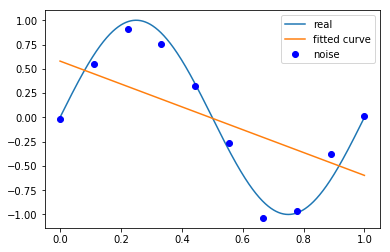

In [32]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters:  [ 20.15855584 -29.92624527   9.98446009  -0.07139302]
p_lsq:  (array([ 20.15855584, -29.92624527,   9.98446009,  -0.07139302]), 1)


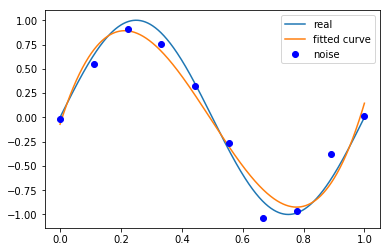

In [33]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters:  [ 1.80018253e+04 -7.76019228e+04  1.39232460e+05 -1.34882947e+05
  7.65279900e+04 -2.57407827e+04  4.93589884e+03 -4.97639163e+02
  2.51454284e+01 -1.33853884e-02]
p_lsq:  (array([ 1.80018253e+04, -7.76019228e+04,  1.39232460e+05, -1.34882947e+05,
        7.65279900e+04, -2.57407827e+04,  4.93589884e+03, -4.97639163e+02,
        2.51454284e+01, -1.33853884e-02]), 2)


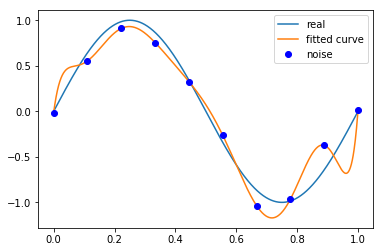

In [34]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [54]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    print("p: ", p)
    print("x: ", x)
    print("y: ", y)
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    # 注: 这里不能写成ret = ret + np.sqrt(0.5 * regularization * np.square(p)), 因为Q（x）实际上是由leastsq计算的，这里只需把残差和正则化项的拼接的数组返回即可。
    print("ret: ", ret)
    print("--------")
    return ret

In [55]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args = (x, y))
print("p_lsq_regularization: ", p_lsq_regularization)

p:  [0.33818961 0.91363641 0.04021309 0.79665108 0.31462058 0.38596989
 0.91130174 0.88020944 0.73602033 0.3513134 ]
x:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
y:  [-0.013385388370835766, 0.5538922391813331, 0.9101801262344204, 0.7546971850304894, 0.3263598278632885, -0.26410356396885826, -1.0356503498072076, -0.9648337579890728, -0.3731654933083476, 0.014319737854897907]
ret:  [ 3.64698786e-01 -1.08616265e-01 -3.40624313e-01 -1.91632961e-02
  6.34360338e-01  1.53973844e+00  2.77327450e+00  3.42151384e+00
  4.01362380e+00  5.65380581e+00  2.39136168e-03  6.46038500e-03
  2.84349456e-04  5.63317378e-03  2.22470344e-03  2.72921925e-03
  6.44387641e-03  6.22402062e-03  5.20444965e-03  2.48416086e-03]
--------
p:  [0.33818961 0.91363641 0.04021309 0.79665108 0.31462058 0.38596989
 0.91130174 0.88020944 0.73602033 0.3513134 ]
x:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778

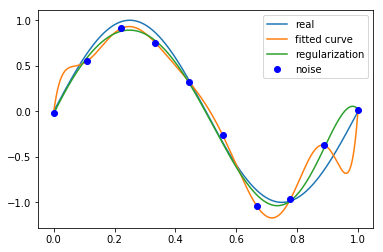

In [56]:
# 可视化
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()